In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
img = cv2.imread("photo1.jpg")

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

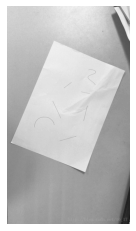

In [4]:
plt.figure()
plt.imshow(gray.astype(np.uint8), cmap="gray")
plt.axis("off")
plt.show()

寻找顶点

In [5]:
# 先进行滤波
img_filtered = cv2.GaussianBlur(gray, (5, 5), 0)

In [6]:
# 图像膨胀
img_dilate = cv2.dilate(img_filtered, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

### cv2.dilate(img, kernel, iteration)

    img – 目标图片

    kernel – 进行操作的内核，默认为3×3的矩阵

    iterations – 腐蚀次数，默认为1

### cv2.getStructuringElement( ) 返回指定形状和尺寸的结构元素

    矩形：MORPH_RECT;

    交叉形：MORPH_CROSS;

    椭圆形：MORPH_ELLIPSE;

    第二参数是内核的尺寸

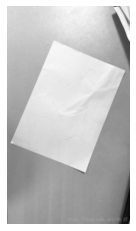

In [7]:
plt.figure()
plt.imshow(img_dilate.astype(np.uint8), cmap="gray")
plt.axis("off")
plt.show()

In [8]:
img_edged = cv2.Canny(img_dilate, 30, 120, 3)

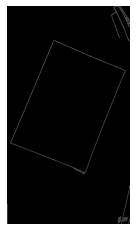

In [9]:
plt.figure()
plt.imshow(img_edged.astype(np.uint8), cmap="gray")
plt.axis("off")
plt.show()

In [10]:
# 检测轮廓
cnts = cv2.findContours(img_edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### contours, hierarchy = cv.findContours( image, mode, method )

    参数1：源图像

    参数2：轮廓的检索方式
    
        1.RETR_LIST : 这是最简单的一种寻找方式，它不建立轮廓间的子属关系，也就是所有轮廓都属于同一层级。这样，hierarchy中的后两个值[First Child, Parent]都为-1

        2.RETR_TREE : 它会完整建立轮廓的层级从属关系

        3.RETR_EXTERNAL : 这种方式只寻找最高层级的轮廓,即全封闭

        4.RETER_CCOMP ：它把所有的轮廓只分为2个层级，不是外层的就是里层的。

    参数3：一般用 cv.CHAIN_APPROX_SIMPLE，就表示用尽可能少的像素点表示轮廓

    contours：图像轮廓坐标，是一个链表

    hierarchy：[Next, Previous, First Child, Parent]

In [11]:
cnts

((array([[[536, 949]],
  
         [[536, 951]],
  
         [[535, 952]],
  
         [[535, 953]],
  
         [[534, 954]],
  
         [[534, 959]],
  
         [[534, 954]],
  
         [[535, 953]],
  
         [[535, 952]],
  
         [[536, 951]],
  
         [[536, 950]],
  
         [[537, 949]],
  
         [[539, 949]]], dtype=int32),
  array([[[537, 939]],
  
         [[537, 944]],
  
         [[536, 945]],
  
         [[536, 946]],
  
         [[537, 947]],
  
         [[536, 946]],
  
         [[536, 945]],
  
         [[537, 944]],
  
         [[537, 940]],
  
         [[538, 939]],
  
         [[539, 940]],
  
         [[538, 939]]], dtype=int32),
  array([[[511, 932]],
  
         [[511, 947]],
  
         [[516, 947]],
  
         [[516, 933]],
  
         [[515, 932]]], dtype=int32),
  array([[[519, 931]],
  
         [[519, 936]],
  
         [[522, 936]],
  
         [[523, 935]],
  
         [[525, 935]],
  
         [[527, 937]],
  
         [[527, 938]],
  
  

In [12]:
cnts = cnts[0]

In [13]:
cnts

(array([[[536, 949]],
 
        [[536, 951]],
 
        [[535, 952]],
 
        [[535, 953]],
 
        [[534, 954]],
 
        [[534, 959]],
 
        [[534, 954]],
 
        [[535, 953]],
 
        [[535, 952]],
 
        [[536, 951]],
 
        [[536, 950]],
 
        [[537, 949]],
 
        [[539, 949]]], dtype=int32),
 array([[[537, 939]],
 
        [[537, 944]],
 
        [[536, 945]],
 
        [[536, 946]],
 
        [[537, 947]],
 
        [[536, 946]],
 
        [[536, 945]],
 
        [[537, 944]],
 
        [[537, 940]],
 
        [[538, 939]],
 
        [[539, 940]],
 
        [[538, 939]]], dtype=int32),
 array([[[511, 932]],
 
        [[511, 947]],
 
        [[516, 947]],
 
        [[516, 933]],
 
        [[515, 932]]], dtype=int32),
 array([[[519, 931]],
 
        [[519, 936]],
 
        [[522, 936]],
 
        [[523, 935]],
 
        [[525, 935]],
 
        [[527, 937]],
 
        [[527, 938]],
 
        [[526, 939]],
 
        [[526, 942]],
 
        [[525, 943]],
 
 

In [14]:
Doccnt = None

In [15]:
if len(cnts) > 0:
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True) # 根基轮廓面积排序

    for c in cnts:
        peri = cv2.arcLength(c, True)  # 计算轮廓周长
        approx = cv2.approxPolyDP(c, 0.02*peri, True)  # 返回顶点位置
        
        if len(approx) == 4: 
            Doccnt = approx
            break


### cv.approxPolyDP()  多边形近似
    参数1是源图像的某个轮廓；
    参数2(epsilon)是一个距离值，表示多边形的轮廓接近实际轮廓的程度，值越小，越精确；
    参数3表示是否闭合。

In [16]:
Doccnt

array([[[207, 151]],

       [[ 16, 603]],

       [[344, 732]],

       [[518, 283]]], dtype=int32)

In [17]:
vertices = []
for i in Doccnt:
    vertices.append(i[0])

In [18]:
print(vertices)

[array([207, 151], dtype=int32), array([ 16, 603], dtype=int32), array([344, 732], dtype=int32), array([518, 283], dtype=int32)]


透视变换

In [19]:
src = np.float32([[207, 151], [517, 285], [17, 601], [343, 731]])

In [20]:
dst = np.float32([[0, 0], [337, 0], [0, 488], [337, 488]])

In [21]:
# 透视变换矩阵
m = cv2.getPerspectiveTransform(src, dst)

In [22]:
result3 = np.zeros(img.shape, img.dtype)

In [23]:
result = cv2.warpPerspective(img, m, (337, 488))

In [24]:
cv2.imshow("src", img)
cv2.imshow("result", result)
cv2.waitKey(0)


-1